### 一、DSP system

**Classification:**

- Static/Dynamic system (Memoryless/Memory system)

- Linear/Nonlinear system

- Time-invariant/Time-varying system

- Causal/Non-causal system

- Stable/Non-stable system

### 二、Sampling rate conversion

#### 1. Downsampling

(1) Downsampling by N (N is an integer)

Example: downsampling by 2

$$y[n]=x[2n]$$

(2) Methods:

- Decimation


- Average


(3) Problem: 

- If the sampling rate conversion is small, the Nyquist-Shannon sampling theorem may be not satisfied and aliasing will be produced.
  
  
- Solution:
  
     Before the downsampling is made, we use the low-pass filter to decrease maximum frequency of the original signal.

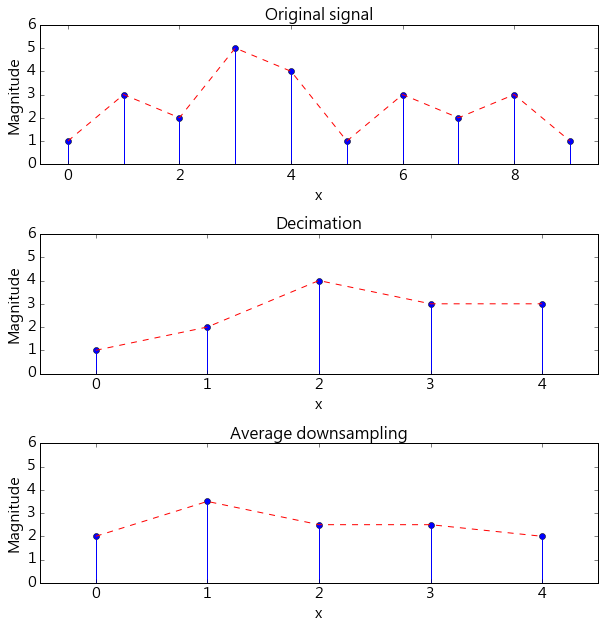

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

def downsampling(x, method = 1):

    N = int(len(x)/2)
    y = np.zeros(N)

    # Decimation
    if method == 1:
        for n in range(N):            
            y[n] = x[2*n]
    
    # Average
    else:    
        for n in range(N):
            y[n] = (x[2*n]+x[2*n+1])/2
            
    return y

def plot_fig(val, title):
    
    fig, axes = plt.subplots(val.size, 1, figsize=(10, val.size * 3 + 1))
    plt.subplots_adjust(hspace = 0.5)
    
    for i in range(val.size):
        axes[i].stem(val[i], lw = 2, color = "blue")
        axes[i].plot(val[i], lw = 1, color = "red", linestyle = "--")
        axes[i].set_xlim(-0.5, val[i].size - 0.5)
        axes[i].set_ylim(0, 6)
        axes[i].set_xlabel("x", fontsize = 15)
        axes[i].set_ylabel("Magnitude", fontsize = 15)
        axes[i].set_title(title[i], fontsize = 16)
        axes[i].tick_params(axis = 'both', labelsize = 15)

    plt.show()

x = np.array([1, 3, 2, 5, 4, 1, 3, 2, 3, 1])
y1 = downsampling(x, method = 1)
y2 = downsampling(x, method = 2)

val = np.array([x, y1, y2])
title = ["Original signal", "Decimation", "Average downsampling"]

plot_fig(val, title)

#### 2. Upsampling

(1) Upsampling by N (N is an integer)

Example: upsampling by 2

$$y[n]=x[n/2]$$

(2) Methods:

- Zero-order hold

  (i) It is commonly used for D/A converters.


- Interpolation (linear interpolation、polynomial interpolation、spline interpolation...)

  (i) For large N, interpolation is a better method than zero-order hold.

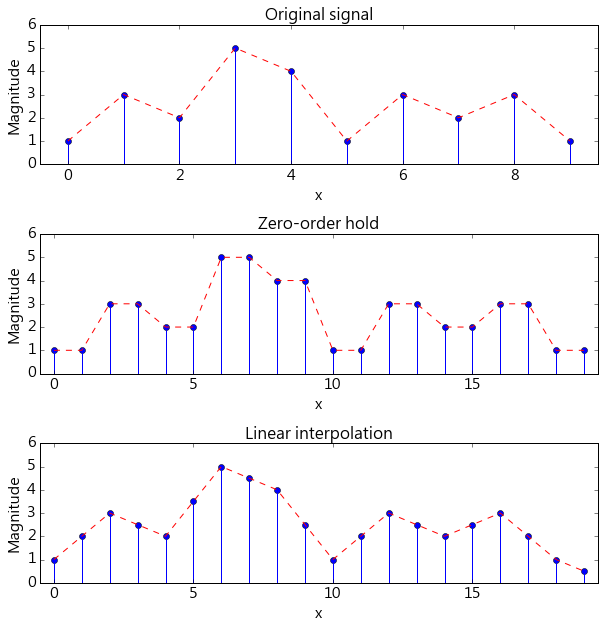

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def upsampling(x, method = 1):

    N = len(x) * 2
    y = np.zeros(N)

    # Zero-order hold
    if method == 1:
        for n in range(N):         
            y[n] = x[int(n/2)]
    
    # Linear interpolation
    else:    
        for n in range(N):
            if int(n/2) == n/2:
                y[n] = x[int(n/2)]
                
            else:
                n1 = int(n/2)
                n2 = n1 + 1
                
                if n2 < len(x):
                    y[n] = (x[n1] + x[n2])/2
                    
                else:
                    y[n] = x[n1]/2
                    
    return y

x = np.array([1, 3, 2, 5, 4, 1, 3, 2, 3, 1])
y1 = upsampling(x, method = 1)
y2 = upsampling(x, method = 2)

val = np.array([x, y1, y2])
title = ["Original signal", "Zero-order hold", "Linear interpolation"]

plot_fig(val, title)

#### 3. Resampling

- If N is not an integer, the sampling rate conversion belongs to resampling.


- Scipy module: **scipy.signal.resample(x, num, t = None, axis = 0, window = None)**

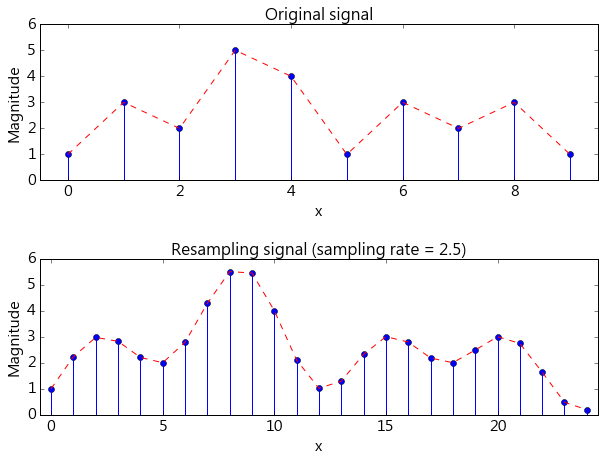

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def resampling(x, sampling_rate):
    num = int(len(x) * sampling_rate)
    y = signal.resample(x, num)
    
    return y

x = np.array([1, 3, 2, 5, 4, 1, 3, 2, 3, 1])
y1 = resampling(x, 2.5)

val = np.array([x, y1])
title = ["Original signal", "Resampling signal (sampling rate = 2.5)"]

plot_fig(val, title)

#### 4. Example: sampling rate conversion for .wav file

- Music source: https://www.bensound.com/royalty-free-music/track/jazzy-frenchy

-- **Sampling Rate Conversion** --

(1) Downsampling by 2 (Decimation)

(2) Downsampling by 2 (Average)

(3) Upsampling by 2 (Zero-Order Hold)

(4) Upsampling by 2 (Linear Interpolation)

(5) Resampling

Please input your choice:

In [4]:
choice = eval(input())

5


In [5]:
import numpy as np
import wave
from scipy.io.wavfile import read
import struct
import scipy.signal as signal

input_filename = "bensound-jazzyfrenchy (online-audio-converter.com).wav"
output_filename = "bensound-jazzyfrenchy_SRC.wav"

# Input module #
#----------------------------------------------
wav = wave.open(input_filename,'rb')

# Read the header
num_channels = wav.getnchannels()
sampwidth = wav.getsampwidth()
fs = wav.getframerate()
num_frames = wav.getnframes()
comptype = wav.getcomptype()
compname = wav.getcompname()

wav.close()

# Read the signal
sampling_rate, x = read(input_filename)
#----------------------------------------------

# Sampling rate conversion #
#----------------------------------------------
def wav_downsampling(x, method = 1):

    N = int(x.shape[0]/2)
    y = np.zeros([N, x.shape[1]])

    # Decimation
    if method == 1:
        for n in range(N):            
            y[n] = x[2*n]
    
    # Average
    else:    
        for n in range(N):
            y[n] = (x[2*n]+x[2*n+1])/2
            
    return y

def wav_upsampling(x, method = 1):

    N = x.shape[0] * 2
    y = np.zeros([N, x.shape[1]])

    # Zero-order hold
    if method == 1:
        for n in range(N):           
            y[n] = x[int(n/2)]
    
    # Linear interpolation
    else:    
        for n in range(N):
            if int(n/2) == n/2:
                y[n] = x[int(n/2)]
                
            else:
                n1 = int(n/2)
                n2 = n1 + 1
                
                if n2 < x.shape[0]:
                    y[n] = (x[n1] + x[n2])/2
                    
                else:
                    y[n] = x[n1]/2
                    
    return y

def wav_resampling(x, sampling_rate):
    num = int(x.shape[0] * sampling_rate)
    y = signal.resample(x, num)
    
    return y

if choice == 1:
    y = wav_downsampling(x, 1)
    new_fs = int(fs/2)
    
elif choice == 2:
    y = wav_downsampling(x, 2)
    new_fs = int(fs/2)
    
elif choice == 3:
    y = wav_upsampling(x, 1)
    new_fs = 2 * fs

elif choice == 4:
    y = wav_upsampling(x, 2)
    new_fs = 2 * fs

elif choice == 5:
    sampling_rate = eval(input("Sampling rate = "))
    y = wav_resampling(x, sampling_rate)
    new_fs = int(sampling_rate * fs)

else:
    print("Your choice is not supported!")
    y = x
    new_fs = fs
    
num_frames = y.shape[0]
#----------------------------------------------

# Output module #
#----------------------------------------------
wav_file = wave.open(output_filename, 'w')

# Write the header
wav_file.setparams((num_channels, sampwidth, new_fs, num_frames, comptype, compname))

# Write the signal
for w in range(y.shape[1]):
    for s in y[:, w]:
        wav_file.writeframes(struct.pack('h', int(s)))

wav_file.close()

Sampling rate = 0.1
